**Общая информация**

**Срок сдачи:** 29 марта 2021, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [5]:
import numpy as np
import matplotlib.pyplot as plt

import scipy as sc

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
from sklearn.metrics import accuracy_score

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [6]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        if self.algorithm=='kd_tree':
            self.tree = KDTree(X,leaf_size=30)

    def brute_func(self, x):
        return np.argmax(np.bincount(self.y[np.argpartition(x, self.n_neighbors - 1)][:self.n_neighbors]))

    def kd_func(self, x):
        id = self.tree.query(x, k = self.n_neighbors)
        return self.y[id]
    
    def predict(self, X):
        if self.algorithm == 'brute':
            p = sc.spatial.distance.cdist(X, self.X, 'euclidean')
            return np.apply_along_axis(self.brute_func, 1, p)
        elif self.algorithm == 'kd_tree':
            _, a = self.tree.query(X, k = self.n_neighbors)
            return np.apply_along_axis(lambda x: np.argmax(np.bincount(self.y[x])), 1, a)
        
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [7]:
iris = datasets.load_iris()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [9]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [10]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [11]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [12]:
%time clf.fit(X_train, y_train)

CPU times: user 1.5 ms, sys: 610 µs, total: 2.11 ms
Wall time: 1.61 ms


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [13]:
%time my_clf.fit(X_train, y_train)

CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 18.4 µs


In [14]:
%time clf.predict(X_test)

CPU times: user 6.87 ms, sys: 0 ns, total: 6.87 ms
Wall time: 5.01 ms


array([2, 0, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1])

In [15]:
%time my_clf.predict(X_test)

CPU times: user 5.91 ms, sys: 0 ns, total: 5.91 ms
Wall time: 3.71 ms


array([2, 0, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [16]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 2.87 ms, sys: 0 ns, total: 2.87 ms
Wall time: 2.13 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 429 µs, sys: 167 µs, total: 596 µs
Wall time: 532 µs


In [20]:
%time clf.predict(X_test)

CPU times: user 2.35 ms, sys: 4.99 ms, total: 7.34 ms
Wall time: 5.43 ms


array([1, 0, 0, 2, 1, 1, 0, 2, 2, 2, 1, 0, 1, 0, 1])

In [21]:
%time my_clf.predict(X_test)

CPU times: user 2.11 ms, sys: 0 ns, total: 2.11 ms
Wall time: 1.61 ms


array([1, 0, 0, 2, 1, 1, 0, 2, 2, 2, 1, 0, 1, 0, 1])

In [22]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [23]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [24]:
data = newsgroups['data']
target = newsgroups['target']
y = target

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english',min_df=0.02)
X = vectorizer.fit_transform(data)
#vectorizer = CountVectorizer(min_df=0.2)
#X = vectorizer.fit_transform(data)
X.shape

(11314, 451)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [36]:
clf = KNeighborsClassifier(n_neighbors=2)


In [37]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

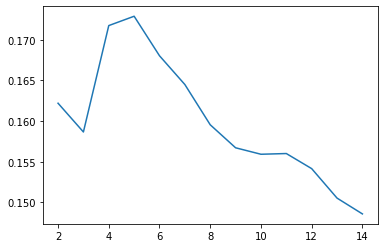

In [38]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances

def findK(X, y):
    fig = plt.subplots()
    accuracy = []
    neigh = 15
    for k in range(2, neigh):
        clf = KNeighborsClassifier(n_neighbors=k)
        kf = KFold(n_splits=3)
        r = 0
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            #clf = KNeighborsClassifier(n_neighbors=k, metric=cosine_similarity)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            r += accuracy_score(y_pred, y_test)
        accuracy.append(r / 3)
    k = np.arange(2, neigh)
    plt.plot(k, accuracy)

findK(X, y)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [39]:
newsgroups_test = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])


In [40]:
data_test = newsgroups_test['data']
y_test = newsgroups_test['target']
X_test = vectorizer.transform(data_test)
X_test.shape

(7532, 451)

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [41]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)
y_pred = clf.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.161311736590547
